<a href="https://colab.research.google.com/github/Vencedor037/MDS/blob/main/%D0%94%D0%97_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнее задание по теме «Временные ряды, общая теория»**
# Задание

1. Скачайте материалы к занятию.
2. Проанализируйте 6 временных рядов из папки Series и сделайте их стационарными:
* monthly-sales-of-company-x-jan-6.csv
* monthly-boston-armed-robberies-j.csv
* international-airline-passengers.csv
* mean-monthly-air-temperature-deg.csv
* weekly-closings-of-the-dowjones-.csv
* daily-total-female-births-in-cal.csv
3. Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [ ]:
# Загрузим библиотечки
import pandas as pd
import numpy as np

In [ ]:
# материалы к занятию
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [ ]:
# анализ 6 временных рядов из папки Series
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Вытащим значения временного ряда по каждому ряду и соберём в словарь
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

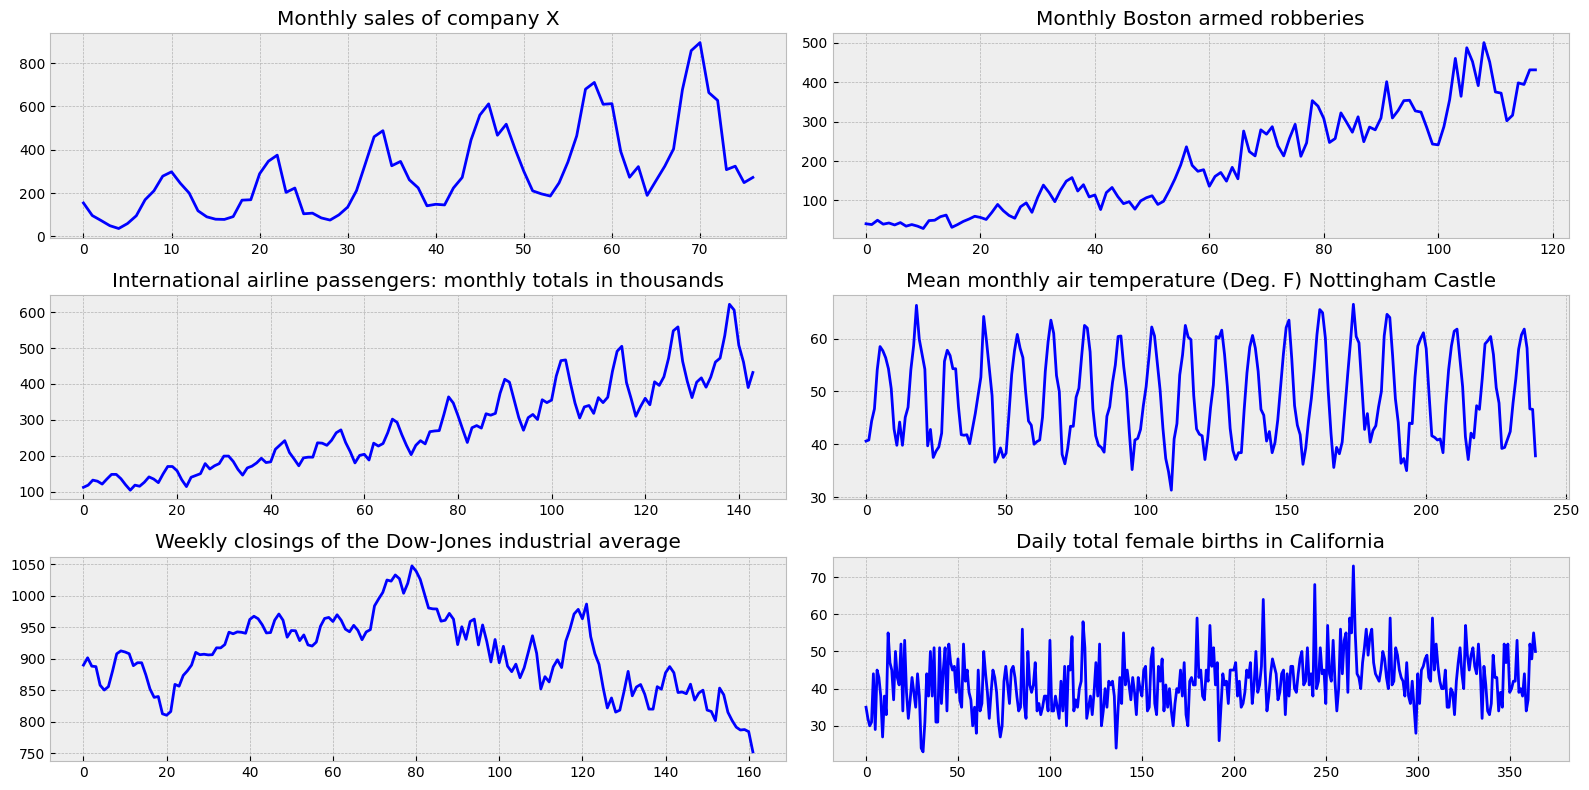

In [ ]:
# Построение
with plt.style.context('bmh'): # Установим временный (пока выполняется блок with) стиль Бенджи Молена
    plt.figure(figsize=(16, 8)) # размерчик графиков
    layout = (3, 2) # расположение - сетка
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x)) # раскидка графиков по сетке
        all_series[key].plot(ax=ts_ax, color='blue') # точки графика
        ts_ax.set_title(key)

    plt.tight_layout()

**Визуально на белый шум ни один ряд не похож: ряды не стационарные**
1.  сезонность, тренд
2.  тренд
3.  сезонность, тренд
4.  цикличность, тренд
5.  цикличность
6.  Ближе всех к стационарности, тренд



In [ ]:
# Проверим математически
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox


In [ ]:
def test_stationarity(timeseries):
    '''Dickey-Fuller'''
    print('Результат теста Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC') # подбор оптимального количества лагов методом AIC
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series): # принадлежность к класу
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Результат теста Dickey-Fuller:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


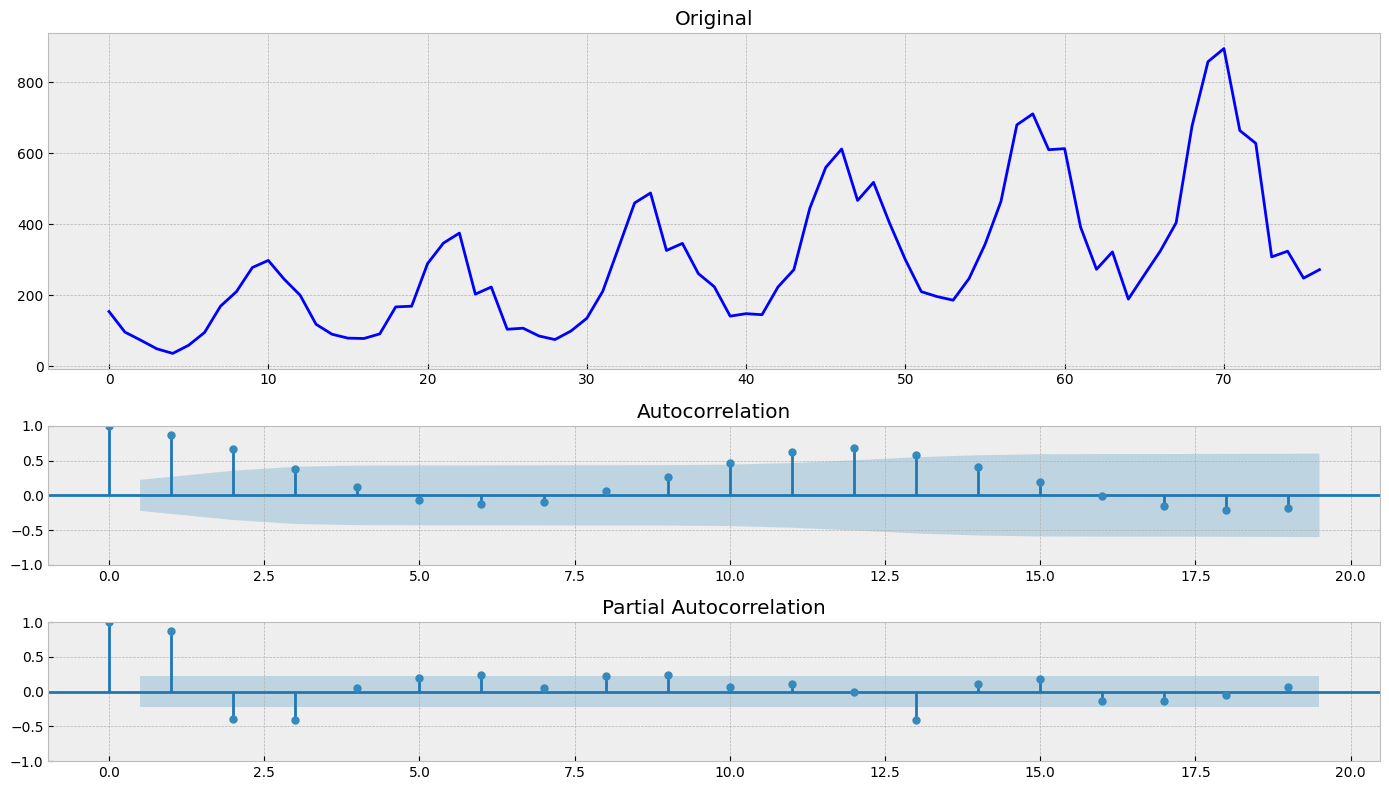

In [ ]:
series = all_series['Monthly sales of company X']
tsplot(series)

**Monthly sales of company X** имеет тренд и рост амплитуды (изм. дисперсии).
Уберем изменение дисперсии при помощи преобразования **Бокса-Кокса** и уберем тренд дифференцированием.

In [ ]:
series = boxcox(series, 0)
series = series[1:] - series[:-1] # Шаг 1, устранение тренда

Результат теста Dickey-Fuller:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


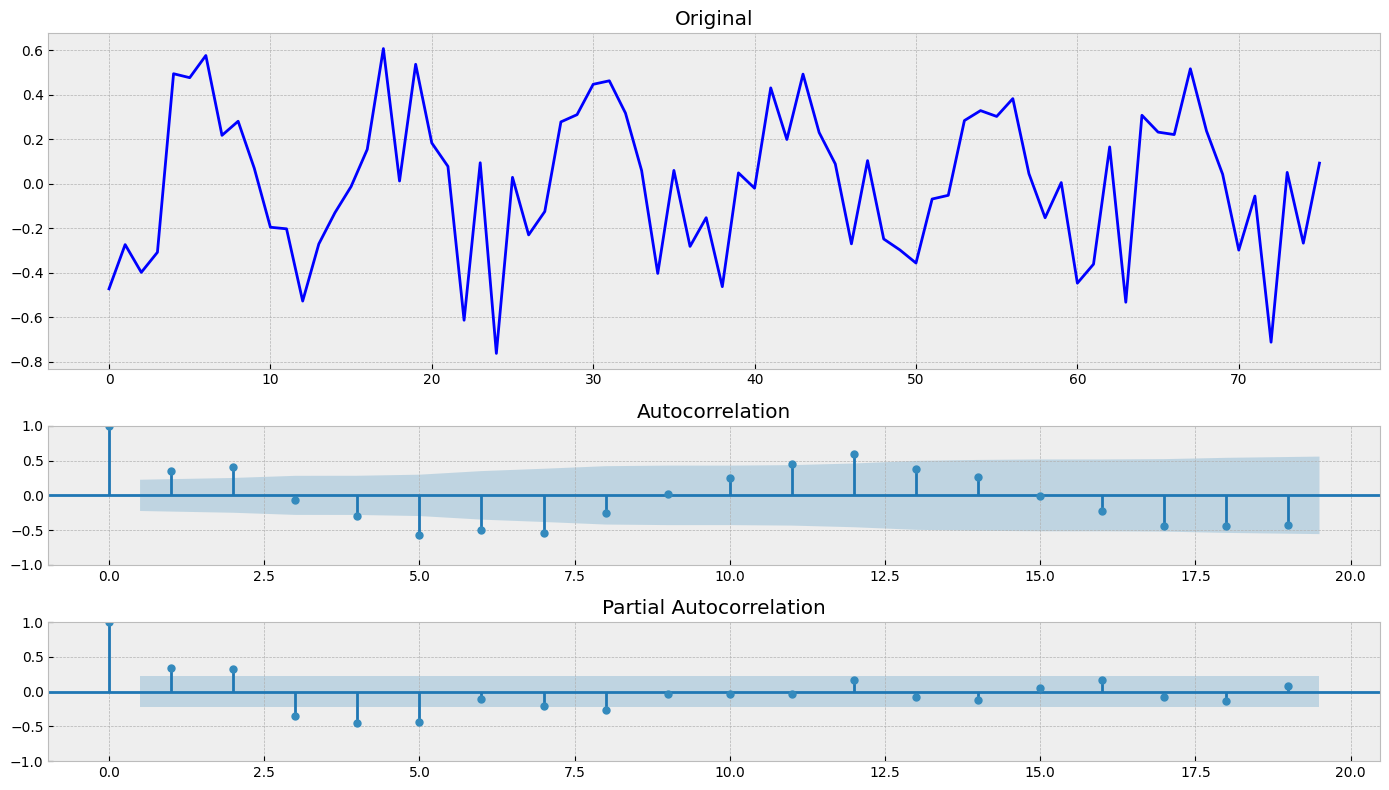

In [ ]:
tsplot(series)

**Monthly sales of company X**

**p-value** = 0.024025 < **0.05**

Результат теста Dickey-Fuller:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


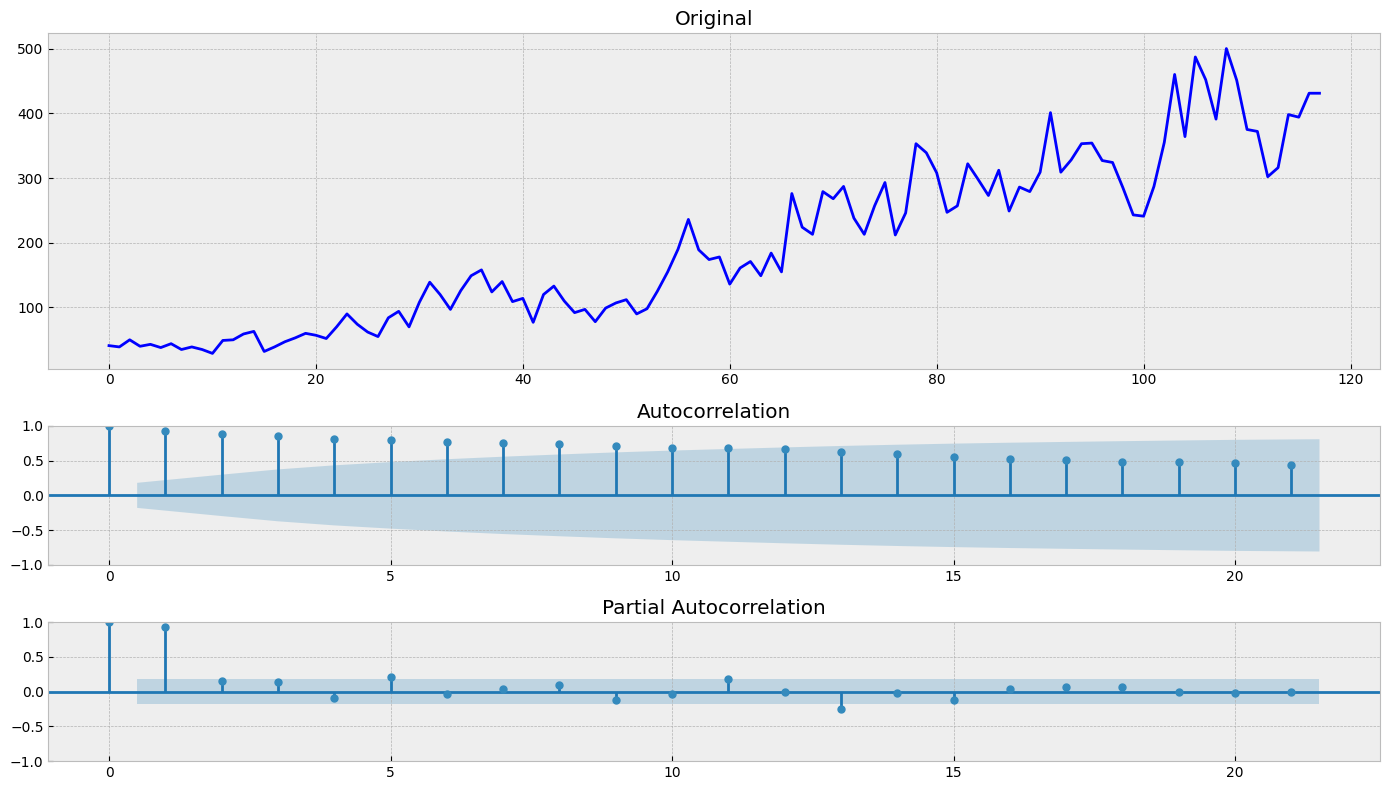

In [ ]:
series = all_series['Monthly Boston armed robberies']
tsplot(series)

**Monthly Boston armed robberies** ряд с монотонно меняющейся дисперсией и трендом.
Применим логарифмирование, преобразования Бокса-Кокса и  дифференцирование (шаг 1)

In [ ]:
series = np.log(series)
series = boxcox(series, 0)
series = series[1:] - series[:-1] # Шаг 1, устранение тренда

Результат теста Dickey-Fuller:
Test Statistic                -7.989208e+00
p-value                        2.500741e-12
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


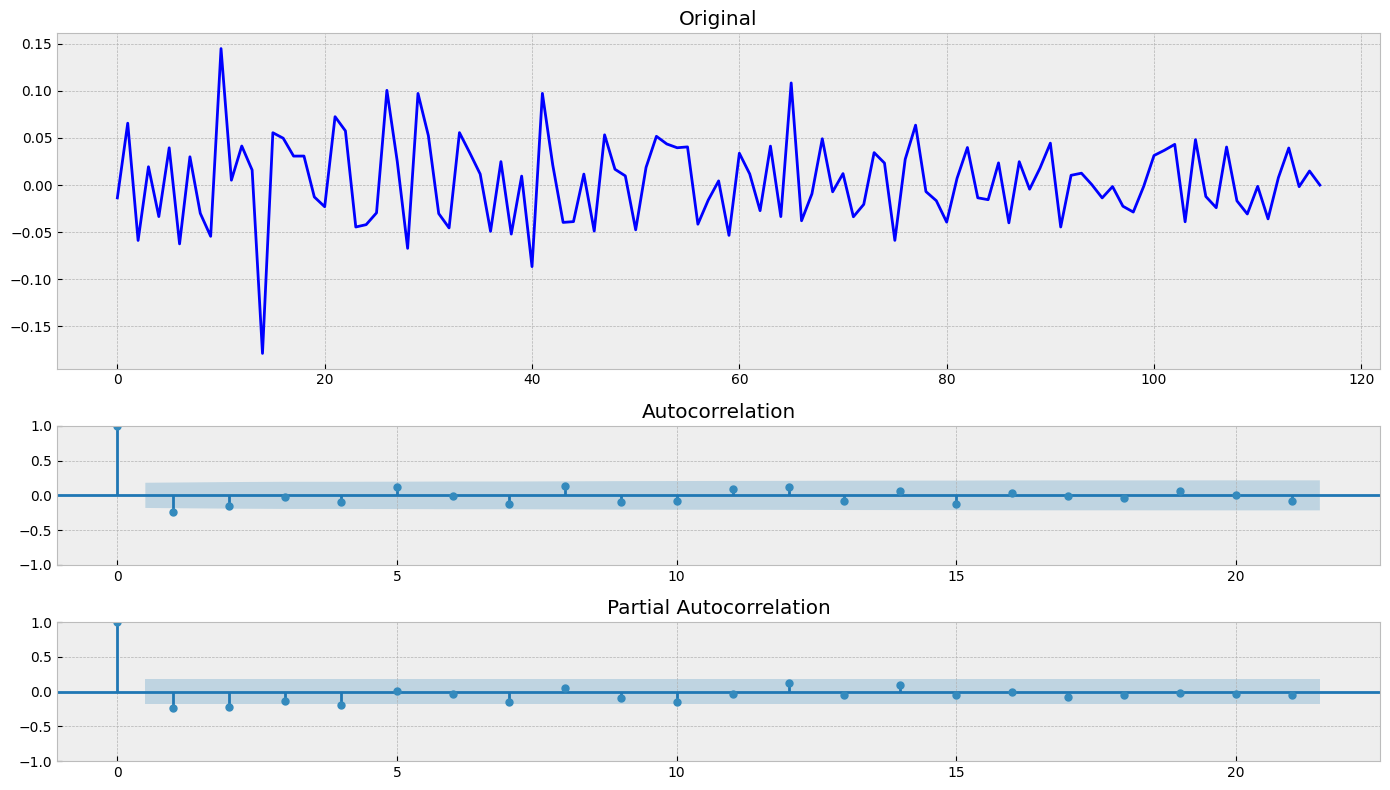

In [ ]:
tsplot(series)

**Monthly Boston armed robberies**

**p-value** = 2.5e-12 < **0.05**

Результат теста Dickey-Fuller:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


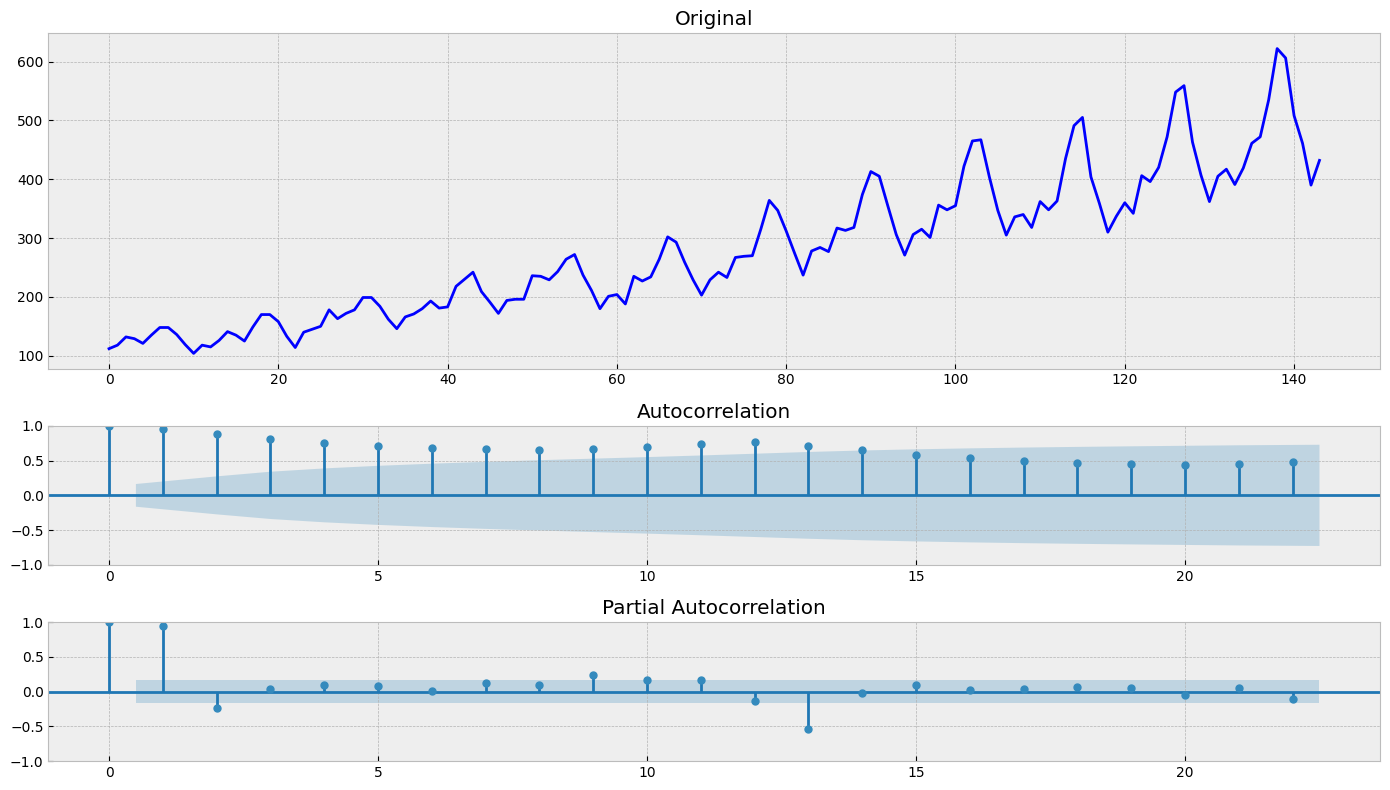

In [ ]:
series = all_series['International airline passengers: monthly totals in thousands']
tsplot(series)

**International airline passengers: monthly totals in thousands** ряд с монотонно меняющейся дисперсией, трендом и сезонностью.
Применим логарифмирование, преобразования Бокса-Кокса и  дифференцирование (шаг 1 и шаг 12)

In [ ]:
series = np.log(series)
series = boxcox(series, 0)
series = series[1:] - series[:-1] # Шаг 1, устранение тренда
series = series[12:] - series[:-12] # Шаг 12, устранение сезонности

Результат теста Dickey-Fuller:
Test Statistic                  -4.424645
p-value                          0.000268
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


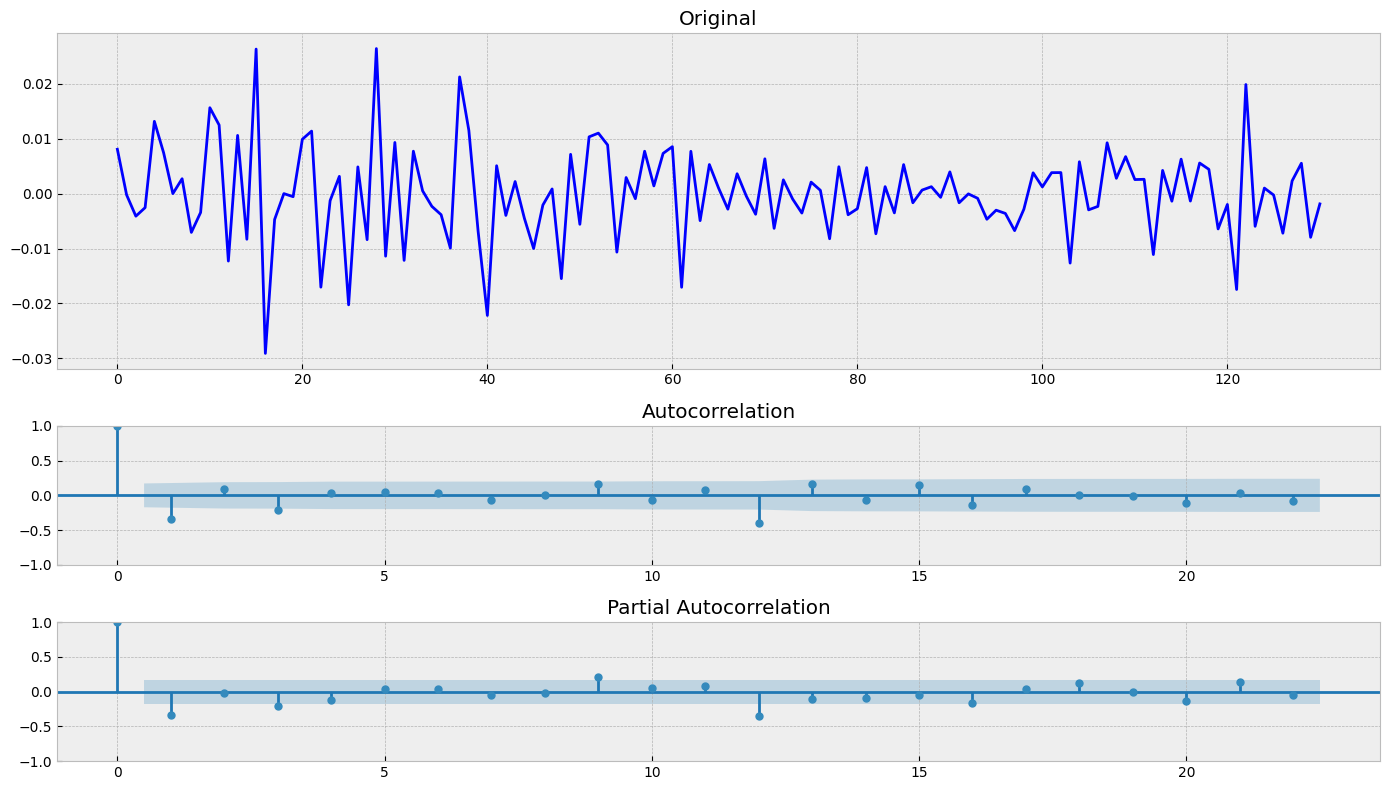

In [ ]:
tsplot(series)

**International airline passengers: monthly totals in thousands**

**p-value** = 0.000268 < **0.05**

Обработаем оставшиеся 3 ряда без визуализации
1. Mean monthly air temperature (Deg. F) Nottingham Castle
2. Weekly closings of the Dow-Jones industrial average
3. Daily total female births in California


In [ ]:
series = all_series['International airline passengers: monthly totals in thousands']
#series = np.log(series)
series = boxcox(series, 0)
series = series[1:] - series[:-1] # Шаг 1, устранение тренда
series = series[12:] - series[:-12] # Шаг 12, устранение сезонности
test_stationarity(series)
#tsplot(series)

Результат теста Dickey-Fuller:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


In [ ]:
series = all_series['Weekly closings of the Dow-Jones industrial average']
series = np.log(series)
series = boxcox(series, 0)
series = series[1:] - series[:-1] # Шаг 1, устранение тренда
#series = series[12:] - series[:-12] # Шаг 12, устранение сезонности
test_stationarity(series)
#tsplot(series)

Результат теста Dickey-Fuller:
Test Statistic                -1.298955e+01
p-value                        2.831309e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


In [ ]:
series = all_series['Daily total female births in California']
series = np.log(series)
series = boxcox(series, 0)
series = series[1:] - series[:-1] # Шаг 1, устранение тренда
#series = series[12:] - series[:-12] # Шаг 12, устранение сезонности
test_stationarity(series)
#tsplot(series)

Результат теста Dickey-Fuller:
Test Statistic                -1.306545e+01
p-value                        2.006827e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64
